In [1]:
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\A1_2020A&PS0155H_2020A7PS1700H_2020A7PS0189H\\fods_1.csv')
data.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [3]:
def get_powers(degree):
    l=[0,1]
    powers=[]
    for i in range(1,degree+1):
        powers.append([x for x in combinations_with_replacement(l,i)])
    powers_flattened=[]
    for sublist in powers:
        for x in sublist:
            powers_flattened.append(x)
    return powers_flattened

In [4]:
def transform_data(X,powers):
    X_new=np.ones((X.shape[0],len(powers)))
    for n in range(X.shape[0]):
        for i in range(len(powers)):
            for j in powers[i]:
                X_new[n][i]=X_new[n][i]*X[n][j]
    return X_new

In [5]:
#data=(data-data.min())/(data.max()-data.min())
data=(data-data.mean())/data.std()

In [6]:
X=data.iloc[:,0:2]
X=X.values
#X[0].max()
X[1].max()

0.18630602348391867

In [7]:
y=data.iloc[:,2:3]
y=y.values 
y.max()

3.235965658847879

In [8]:
powers_0=get_powers(0)
powers_1=get_powers(1)
powers_2=get_powers(2)
powers_3=get_powers(3)
powers_4=get_powers(4)
powers_5=get_powers(5)
powers_6=get_powers(6)
powers_7=get_powers(7)
powers_8=get_powers(8)
powers_9=get_powers(9)

In [9]:
X_0=transform_data(X,powers_0)
X_1=transform_data(X,powers_1)
X_2=transform_data(X,powers_2)
X_3=transform_data(X,powers_3)
X_4=transform_data(X,powers_4)
X_5=transform_data(X,powers_5)
X_6=transform_data(X,powers_6)
X_7=transform_data(X,powers_7)
X_8=transform_data(X,powers_8)
X_9=transform_data(X,powers_9)

In [10]:

y=(y-y.mean())/y.std()
X_1=(X_1-X_1.mean())/X_1.std()
X_2=(X_2-X_2.mean())/X_2.std()
X_3=(X_3-X_3.mean())/X_3.std()
X_4=(X_4-X_4.mean())/X_4.std()
X_5=(X_5-X_5.mean())/X_5.std()
X_6=(X_6-X_6.mean())/X_6.std()
X_7=(X_7-X_7.mean())/X_7.std()
X_8=(X_8-X_8.mean())/X_8.std()
X_9=(X_9-X_9.mean())/X_9.std()


In [11]:
def concatenate_ones(X):
    ones=np.ones((X.shape[0],1))
    X=np.concatenate((ones,X),axis=1) 
    return X

def predicted(X,theta):
    return (X@(np.transpose(theta)))
# @ symbol is used for matrix multiplication 

def cost(X,y,theta):
     return ((1/2)*np.sum(np.square((predicted(X,theta))-y)))
    
def squared_error(X,y,final_weights):
    return (1/(2*len(y)))*np.sum(np.square(predicted(X,final_weights)-y))

In [12]:
def stochastic_gradient_descent(X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        cost_=0.0
        for j in range(len(y)):
            random_index=np.random.randint(0,len(y))
            X_rand=X[random_index,:].reshape(1,X.shape[1])
            y_rand=y[random_index].reshape(1,1)
            theta = theta - (learning_rate/len(X)) * np.sum(X_rand * ((predicted(X_rand,theta)) - y_rand), axis=0)
            cost_=cost(X_rand, y_rand, theta)
            cost_history[i] = cost_
            
    return theta,cost_history

In [13]:
def make_model_stochastic_gradient_descent(X,y,learning_rate,iterations,degree):
    print("fitting polynomial of degree: "+str(degree))   
    X=concatenate_ones(X)
    theta=np.ones((1,X.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70, shuffle=True)

    final_weights,cost_history = stochastic_gradient_descent(X_train,y_train,theta,learning_rate,iterations)
    squared_error_test=squared_error(X_test,y_test,final_weights)
    squared_train_error=squared_error(X_train,y_train,final_weights)
    print("Weights: "+str(final_weights))
    print("squared_error for training dataset: "+str(squared_train_error))
    print("squared_error for testing dataset: "+str(squared_error_test))
    
    return squared_train_error,squared_error_test

In [14]:
squared_error_list_1=[]
squared_train_error_1=[]

In [15]:
m=make_model_stochastic_gradient_descent(X_0,y,0.0001,1000,0)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 0
Weights: [[0.90244441]]
squared_error for training dataset: 0.9307937745358547
squared_error for testing dataset: 0.8136975428202745


In [16]:
m=make_model_stochastic_gradient_descent(X_1,y,0.0001,1000,1)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 1
Weights: [[0.90580581 0.93409424 0.91743381]]
squared_error for training dataset: 1.154779688842148
squared_error for testing dataset: 1.3246100602848287


In [17]:
m=make_model_stochastic_gradient_descent(X_2,y,0.0001,1000,2)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 2
Weights: [[0.9170165  1.02474385 0.96359701 0.85621267 0.98869907 0.79271136]]
squared_error for training dataset: 2.0155193378958893
squared_error for testing dataset: 5.890615516048917


In [18]:
m=make_model_stochastic_gradient_descent(X_3,y,0.0001,1000,3)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 3
Weights: [[0.9202955  0.98777991 0.97588997 1.00024397 0.988857   0.91871715
  0.85012725 0.99904267 0.99119284 0.69760272]]
squared_error for training dataset: 2.489863467617086
squared_error for testing dataset: 18.179479184285324


In [19]:
m=make_model_stochastic_gradient_descent(X_4,y,0.0001,1000,4)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 4
Weights: [[0.93030617 1.00854326 0.9989443  0.98666481 1.00769397 0.97479044
  1.05062635 0.97197162 1.03199109 0.90723217 0.75468214 1.10640781
  0.89684829 1.10005103 0.58768608]]
squared_error for training dataset: 1.974766002238696
squared_error for testing dataset: 33.01623044999966


In [20]:
m=make_model_stochastic_gradient_descent(X_5,y,0.0001,1000,5)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 5
Weights: [[0.92799961 1.00196037 1.00098302 1.00248853 1.00100022 0.99537378
  0.99101497 1.00504218 1.00380227 0.97774976 1.05033683 0.97299359
  1.00452649 1.01681608 0.89089697 0.73549066 1.12937397 0.9366131
  0.99486081 1.1005063  0.50605606]]
squared_error for training dataset: 1.7574770169565919
squared_error for testing dataset: 48.09221205429552


In [21]:
m=make_model_stochastic_gradient_descent(X_6,y,0.0001,1000,6)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 6
Weights: [[0.93830574 1.0019831  1.0013952  1.00072608 1.00205086 0.99989394
  1.00480995 0.99979977 1.00386022 0.99538    0.9869456  1.00872526
  0.99520277 1.00958269 0.97308725 1.06913276 0.96539053 1.02235747
  0.98188841 1.0377144  0.87557519 0.66827608 1.17180725 0.90473074
  1.05973394 0.92808165 1.16315422 0.42107339]]
squared_error for training dataset: 1.2681624051107925
squared_error for testing dataset: 58.55347771871324


In [22]:
m=make_model_stochastic_gradient_descent(X_7,y,0.0001,1000,7)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 7
Weights: [[0.92933911 1.00088881 1.00083473 1.00089413 1.00082854 1.00051495
  1.00036952 1.00108309 1.00106481 0.99957744 1.00353232 0.99938091
  1.00102507 1.00193958 0.994568   0.98676779 1.00803898 0.99763659
  1.00048777 1.00741516 0.97204992 1.07074298 0.96380053 1.01855052
  0.99373921 0.99443104 1.03439525 0.86503841 0.65014501 1.18290418
  0.90620175 1.04500845 0.99056985 0.95995584 1.170003   0.36154323]]
squared_error for training dataset: 1.1874010474431147
squared_error for testing dataset: 65.0130307725952


In [23]:
m=make_model_stochastic_gradient_descent(X_8,y,0.0001,1000,8)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 8
Weights: [[0.94426662 1.00084344 1.0008153  1.00078395 1.00084745 1.00074025
  1.00098053 1.00074386 1.00094592 1.00051474 1.00015855 1.00116837
  1.00052204 1.0012614  0.99935792 1.00400161 0.99916208 1.00184178
  0.99985767 1.00280888 0.99420654 0.98534238 1.00884646 0.99632017
  1.00372222 0.9970648  1.00974397 0.96987216 1.07704654 0.96096955
  1.0218839  0.98876924 1.01019697 0.98550827 1.04276455 0.85555518
  0.6230217  1.19763059 0.89704363 1.05599733 0.96674907 1.03345246
  0.93327812 1.19987309 0.31244297]]
squared_error for training dataset: 0.8980198898997502
squared_error for testing dataset: 65.55301796347646


In [24]:
m=make_model_stochastic_gradient_descent(X_9,y,0.0001,1000,9)
squared_train_error_1.append(m[0])
squared_error_list_1.append(m[1])

fitting polynomial of degree: 9
Weights: [[0.92657791 1.00048129 1.00047845 1.00047969 1.00047844 1.00046229
  1.00046176 1.00048883 1.00049289 1.00041732 1.00058893 1.00042019
  1.00048143 1.00054223 1.00016631 0.99990238 1.00078174 1.00035828
  1.00044447 1.00084096 0.99902971 1.00341137 0.99893517 1.00121599
  1.00022469 1.00009832 1.00228611 0.9935659  0.98573882 1.0081799
  0.99652845 1.00231184 1.00024804 0.99821046 1.00950671 0.96767283
  1.0742885  0.9618324  1.02046569 0.99029336 1.00461283 1.00178249
  0.9881733  1.04471916 0.84391061 0.63073846 1.1936199  0.8996491
  1.0525511  0.97484615 1.00841539 1.01345549 0.93765358 1.21649744
  0.25168055]]
squared_error for training dataset: 0.8730349374074778
squared_error for testing dataset: 62.555965408996094


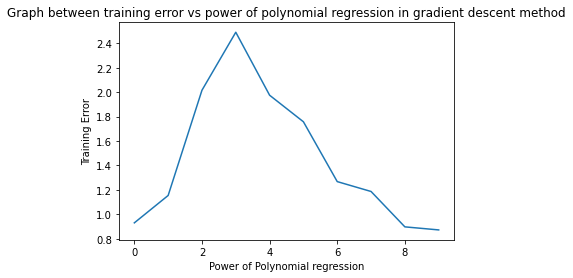

In [25]:
y_axis=squared_train_error_1
x_axis=np.array([0,1,2,3,4,5,6,7,8,9])
plt.plot(x_axis,y_axis)
plt.xlabel("Power of Polynomial regression")
plt.ylabel("Training Error")
plt.title("Graph between training error vs power of polynomial regression in gradient descent method")
plt.show()

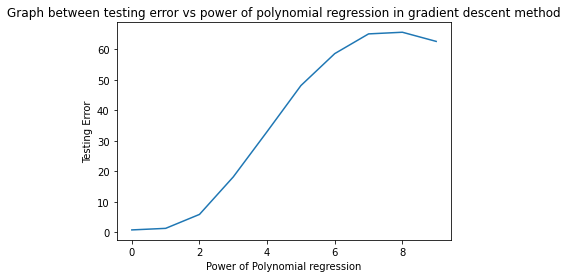

In [26]:
y_axis=squared_error_list_1
x_axis=np.array([0,1,2,3,4,5,6,7,8,9])
plt.plot(x_axis,y_axis)
plt.xlabel("Power of Polynomial regression")
plt.ylabel("Testing Error")
plt.title("Graph between testing error vs power of polynomial regression in gradient descent method")
plt.show()

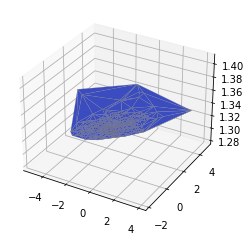

In [27]:
x1=data['MLOGP']
x2=data['RDCHI']
y=1.34454828+(0*x1)+(0*x2)
ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('coolwarm')
trisurf = ax.plot_trisurf(x1, x2, y,cmap = my_cmap,linewidth = 0.2,antialiased = True,edgecolor = 'grey')
plt.show()